In [132]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [133]:
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = 'Times New Roman'

In [134]:
df = pd.read_csv("../results/analyzed_models_10times/mean.csv")
display(df.sort_values("r").iloc[::-1])

,rho,nu,zeta,eta,gamma,c,oc,oo,nc,no,y,r,h,g
329,5,30,0.2,1.0,0.997582,0.048829,0.000325,0.030690,0.001437,0.967548,0.809240,0.786700,0.992189,0.190114
1029,25,30,0.2,1.0,0.989480,0.115774,0.017173,0.193363,0.020347,0.769116,0.731574,0.786452,0.985467,0.269308
229,5,10,0.2,1.0,0.995712,0.109440,0.005912,0.109286,0.011817,0.872985,0.763091,0.786252,0.988487,0.236330
504,10,30,0.2,1.0,0.998331,0.072192,0.001412,0.065086,0.004856,0.928646,0.787473,0.785389,0.990636,0.212804
279,5,20,0.2,1.0,0.997299,0.066948,0.000975,0.048169,0.003000,0.947857,0.795942,0.784689,0.991314,0.203408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,25,1,0.4,1.0,0.119456,0.396142,0.228021,0.771866,0.000025,0.000087,0.042502,0.018569,0.968342,0.231229
1050,30,1,0.2,0.2,0.158279,0.322241,0.316779,0.683083,0.000019,0.000119,0.052116,0.017231,0.959871,0.223216
1070,30,1,1.0,0.2,0.084662,0.330517,0.191014,0.808943,0.000006,0.000037,0.020863,0.012877,0.977753,0.217440
1053,30,1,0.2,0.8,0.129750,0.399169,0.300412,0.699444,0.000037,0.000106,0.042045,0.005828,0.958777,0.223231


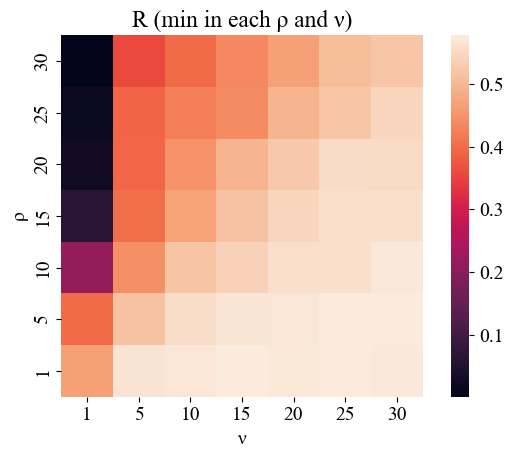

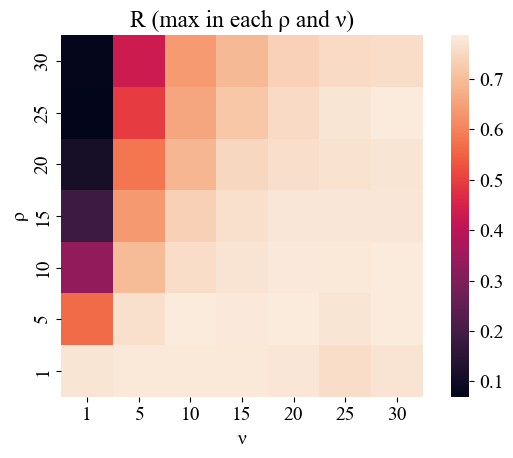

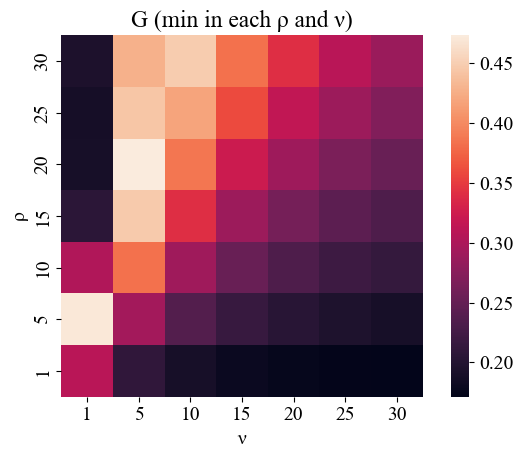

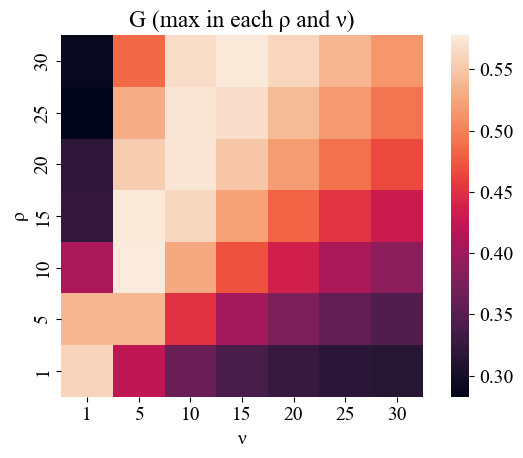

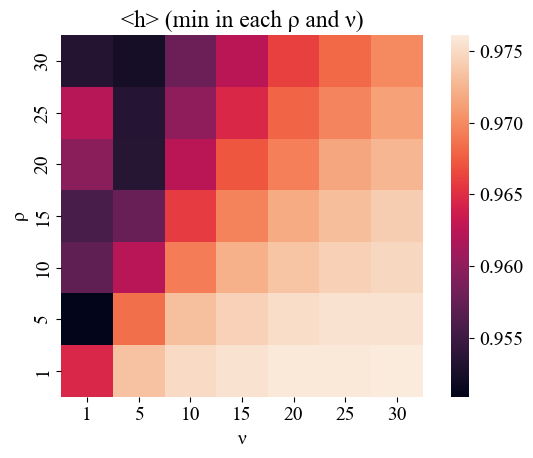

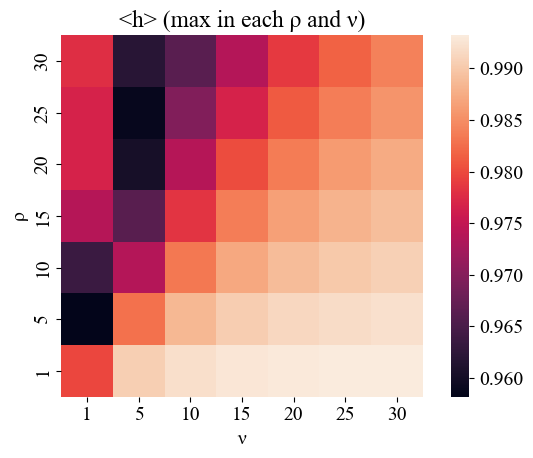

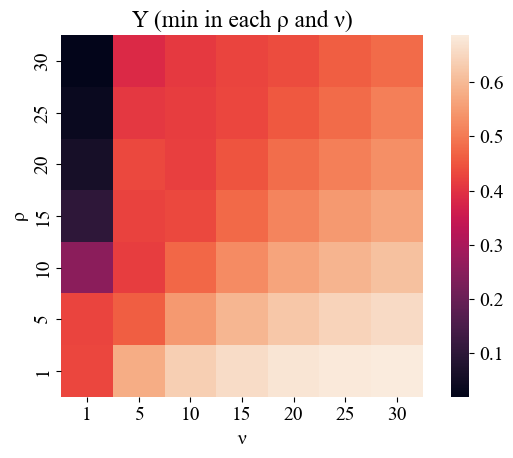

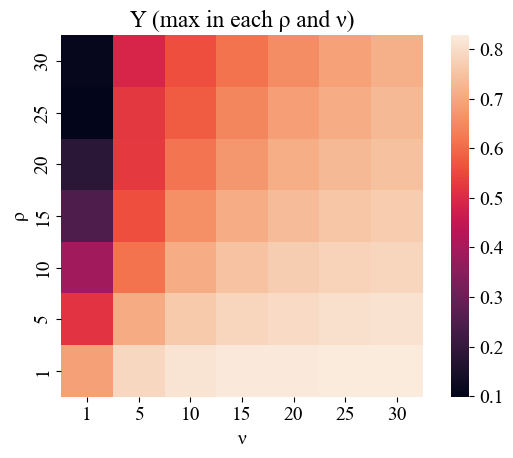

In [135]:
import os
import shutil

names = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

out_dir = "results/imgs/novelty_ranges"

shutil.rmtree(out_dir, ignore_errors=True)
os.makedirs(out_dir, exist_ok=True)

for value in ["r", "g", "h", "y"]:
    for min_max in [min, max]:
        _data = df.pivot_table(
            index="rho",
            columns="nu",
            values=value,
            aggfunc=min_max,
        )[::-1]
        sns.heatmap(_data, square=True)
        plt.title(f"{names[value]} ({min_max.__name__} in each ρ and ν)")
        plt.xlabel("ν")
        plt.ylabel("ρ")
        plt.tight_layout()
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.png", dpi=100)
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.pdf")
        plt.show()
        plt.close()


In [136]:
metrics_dict = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

/var/folders/n2/hj0zwjr54pv8rv881kl29ccm0000gn/T/ipykernel_1244/3228464062.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore


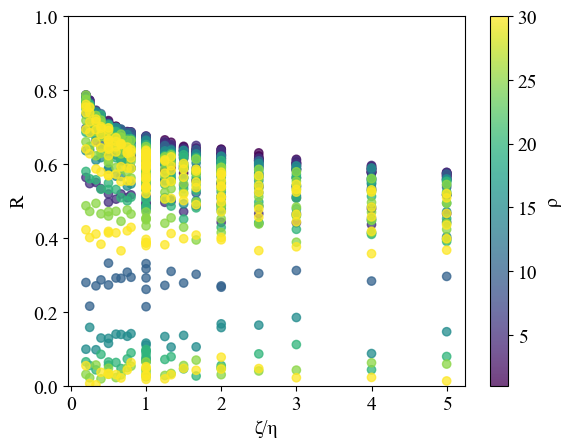

/var/folders/n2/hj0zwjr54pv8rv881kl29ccm0000gn/T/ipykernel_1244/3228464062.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore


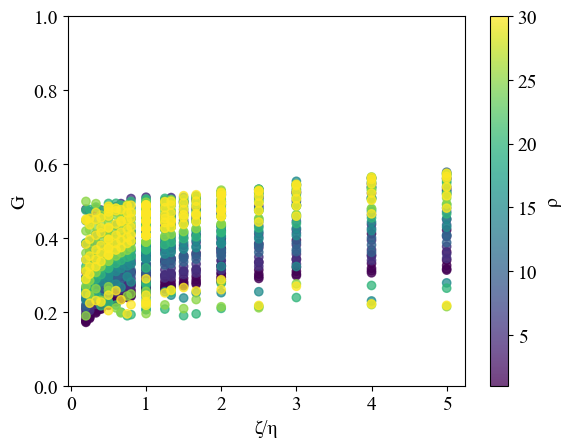

/var/folders/n2/hj0zwjr54pv8rv881kl29ccm0000gn/T/ipykernel_1244/3228464062.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore


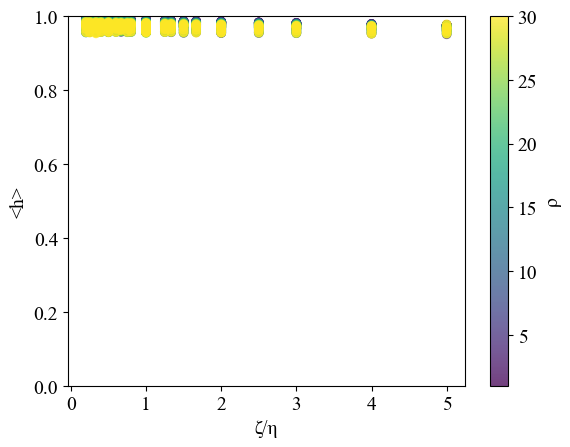

/var/folders/n2/hj0zwjr54pv8rv881kl29ccm0000gn/T/ipykernel_1244/3228464062.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore


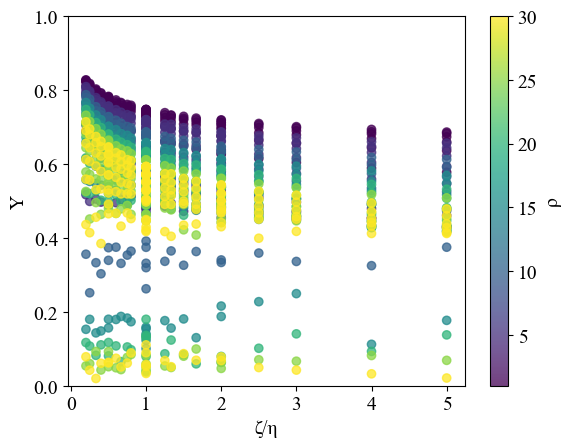

In [137]:
for metrics, label in metrics_dict.items():

    _data = df.copy()
    _data["ratio"] = _data["zeta"] / _data["eta"]

    cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore
    fig = plt.figure()
    ax = fig.add_subplot()

    mappable = ax.scatter(x=_data["ratio"], y=_data[metrics], c=_data["rho"], cmap=cm, alpha=0.75)
    cb = fig.colorbar(mappable, ax=ax)
    cb.set_label("ρ")

    plt.ylim(0, 1)
    plt.xlabel("ζ/η")
    plt.ylabel(label)
    plt.show()


In [138]:
aps = pd.read_csv("../results/analyzed_targets/aps.csv").iloc[0]
twitter = pd.read_csv("../results/analyzed_targets/twitter.csv").iloc[0]

display(aps)
display(twitter)

rho      0.000000
nu       0.000000
zeta     0.000000
eta      0.000000
gamma    0.998455
c        0.038424
oc       0.009249
oo       0.140857
nc       0.019998
no       0.829896
y        0.743914
r        0.629015
h        0.989714
g        0.218959
Name: 0, dtype: float64

rho      0.000000
nu       0.000000
zeta     0.000000
eta      0.000000
gamma    0.914799
c        0.061654
oc       0.084114
oo       0.298838
nc       0.044244
no       0.572803
y        0.495009
r        0.475842
h        0.961771
g        0.225112
Name: 0, dtype: float64

min
rho      30.000000
nu        1.000000
zeta      0.200000
eta       0.600000
gamma     0.098688
c         0.292450
oc        0.169891
oo        0.830015
nc        0.000031
no        0.000062
y         0.019605
r         0.002552
h         0.953319
g         0.230526
ratio     0.333333
Name: 1052, dtype: float64
max
rho       5.000000
nu       30.000000
zeta      0.200000
eta       1.000000
gamma     0.997582
c         0.048829
oc        0.000325
oo        0.030690
nc        0.001437
no        0.967548
y         0.809240
r         0.786700
h         0.992189
g         0.190114
ratio     0.200000
Name: 329, dtype: float64


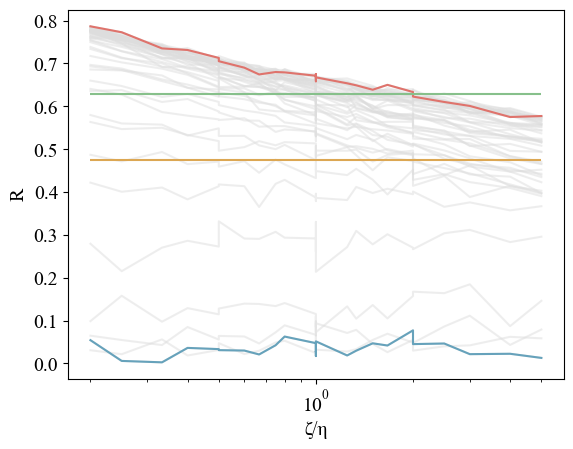

min
rho       1.000000
nu       30.000000
zeta      0.200000
eta       1.000000
gamma     0.999611
c         0.023108
oc        0.000056
oo        0.008768
nc        0.000144
no        0.991032
y         0.827419
r         0.770029
h         0.993212
g         0.171416
ratio     0.200000
Name: 154, dtype: float64
max
rho      10.000000
nu        5.000000
zeta      1.000000
eta       0.200000
gamma     0.951484
c         0.179707
oc        0.260249
oo        0.469754
nc        0.039089
no        0.230909
y         0.417441
r         0.442679
h         0.962348
g         0.577710
ratio     5.000000
Name: 395, dtype: float64


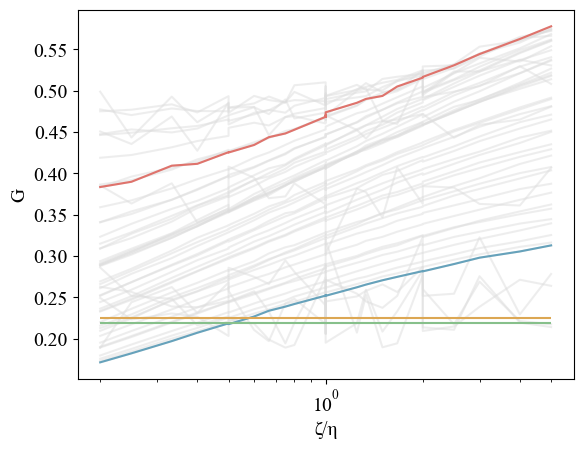

min
rho      5.000000
nu       1.000000
zeta     1.000000
eta      0.200000
gamma    0.849034
c        0.294567
oc       0.506062
oo       0.420379
nc       0.017754
no       0.055806
y        0.428146
r        0.397368
h        0.950882
g        0.530418
ratio    5.000000
Name: 195, dtype: float64
max
rho       1.000000
nu       30.000000
zeta      0.200000
eta       1.000000
gamma     0.999611
c         0.023108
oc        0.000056
oo        0.008768
nc        0.000144
no        0.991032
y         0.827419
r         0.770029
h         0.993212
g         0.171416
ratio     0.200000
Name: 154, dtype: float64


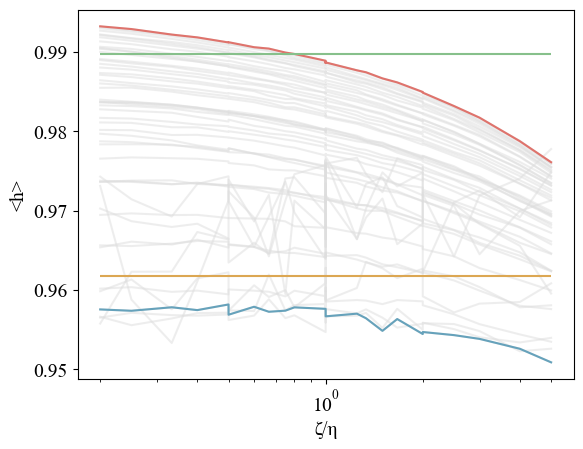

min
rho      30.000000
nu        1.000000
zeta      0.200000
eta       0.600000
gamma     0.098688
c         0.292450
oc        0.169891
oo        0.830015
nc        0.000031
no        0.000062
y         0.019605
r         0.002552
h         0.953319
g         0.230526
ratio     0.333333
Name: 1052, dtype: float64
max
rho       1.000000
nu       30.000000
zeta      0.200000
eta       1.000000
gamma     0.999611
c         0.023108
oc        0.000056
oo        0.008768
nc        0.000144
no        0.991032
y         0.827419
r         0.770029
h         0.993212
g         0.171416
ratio     0.200000
Name: 154, dtype: float64


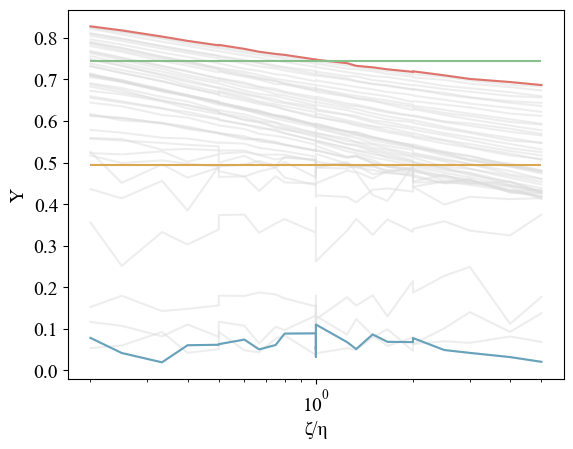

In [148]:
colors = {
    "violet" : "#A884A3",
    "blue" : "#66A2BB",
    "green" : "#87C08B",
    "orange" : "#DCA753",
    "red" : "#DF736C",
    "black" : "#555555",
}

_data = df.copy()
_data["ratio"] = _data["zeta"] / _data["eta"]
_data = _data.sort_values("ratio")

metrics, metrics_label = list(metrics_dict.items())[0]

for metrics, metrics_label in metrics_dict.items():

    gd = _data.groupby(by=["rho", "nu"])
    for _, _df in gd:
        plt.plot(_df.ratio, _df[metrics], color="#DDDDDD", alpha=0.5)


    # 最小値を取る線をプロット
    min_row = _data.iloc[_data[metrics].argmin()]
    min_data = _data.loc[(_data.rho == min_row.rho) & (_data.nu == min_row.nu)]
    print("min")
    print(min_row)
    plt.plot(min_data.ratio, min_data[metrics], color=colors["blue"])

    # 最大値を取る線をプロット
    max_row = _data.iloc[_data[metrics].argmax()]
    max_data = _data.loc[(_data.rho == max_row.rho) & (_data.nu == max_row.nu)]
    print("max")
    print(max_row)
    plt.plot(max_data.ratio, max_data[metrics], color=colors["red"])

    # Twitter のデータをプロット
    plt.hlines(y=[twitter[metrics]], xmin=0.2, xmax=5, colors=colors["orange"])

    # APS のデータをプロット
    plt.hlines(y=[aps[metrics]], xmin=0.2, xmax=5, colors=colors["green"])

    plt.xlabel("ζ/η")
    plt.ylabel(metrics_label)
    plt.xscale("log")

    plt.show()

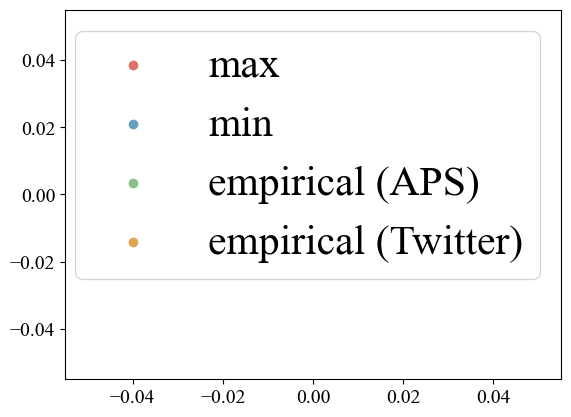

In [145]:
# 凡例を生成するだけのもの
fig, ax = plt.subplots()
ax.scatter([], [], c=colors["red"], label="max")
ax.scatter([], [], c=colors["blue"], label="min")
ax.scatter([], [], c=colors["green"], label="empirical (APS)")
ax.scatter([], [], c=colors["orange"], label="empirical (Twitter)")
ax.legend(prop={'size': 30})
plt.show()